In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import files
uploaded=files.upload()


Saving crime_data.csv to crime_data.csv


In [3]:
data=pd.read_csv("crime_data.csv")

In [4]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


EDA

In [5]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<ipython-input-11-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

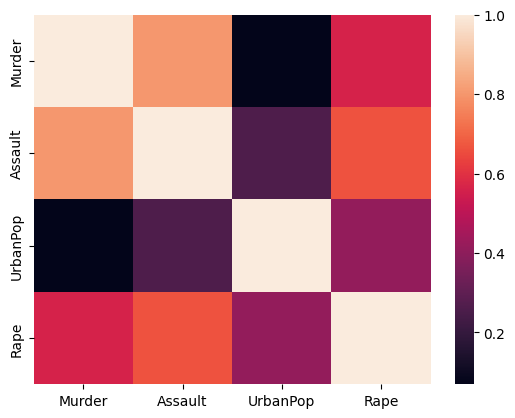

In [11]:
sns.heatmap(data.corr())

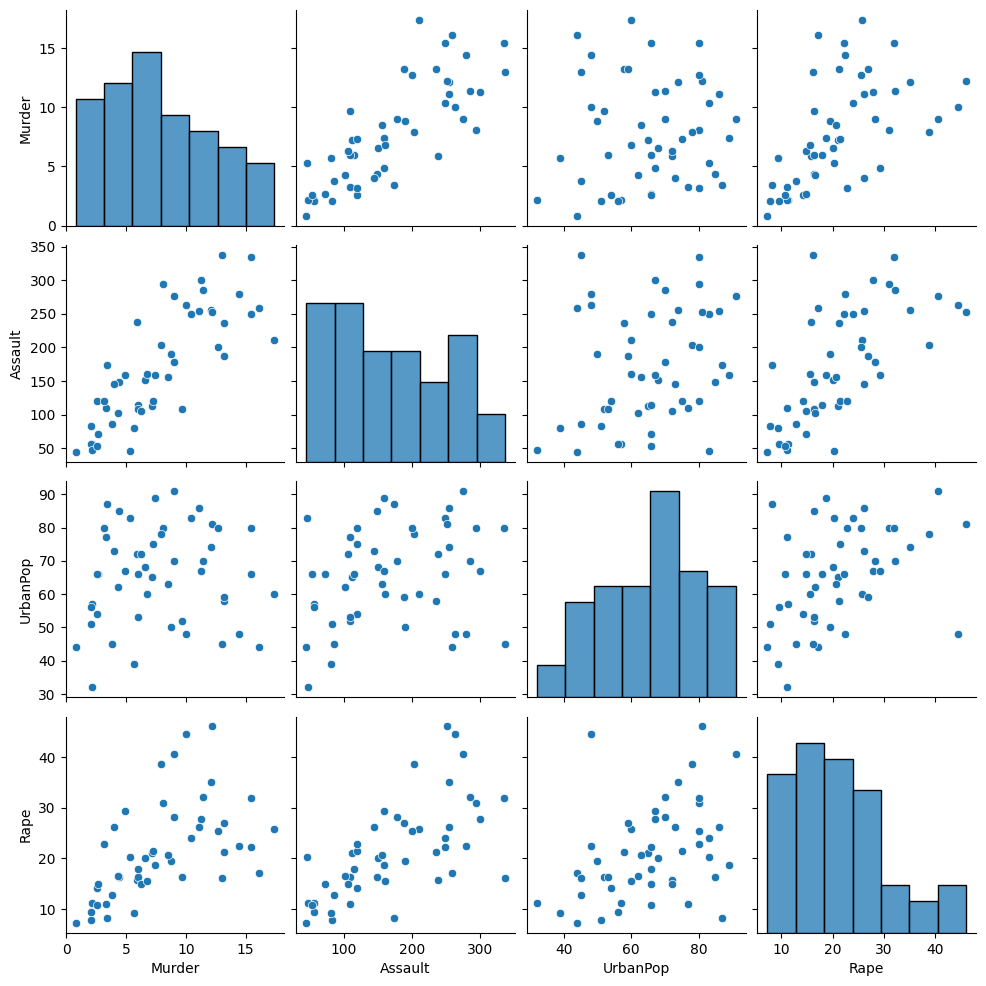

In [12]:
sns.pairplot(data)

From the graphs we can observe how well each column is related and clustered

<Axes: xlabel='Assault', ylabel='Murder'>

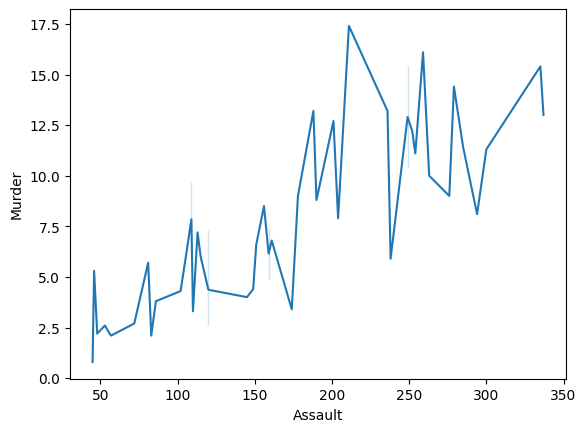

In [13]:
sns.lineplot(x='Assault',y='Murder',data=data)

<Axes: xlabel='Assault', ylabel='Murder'>

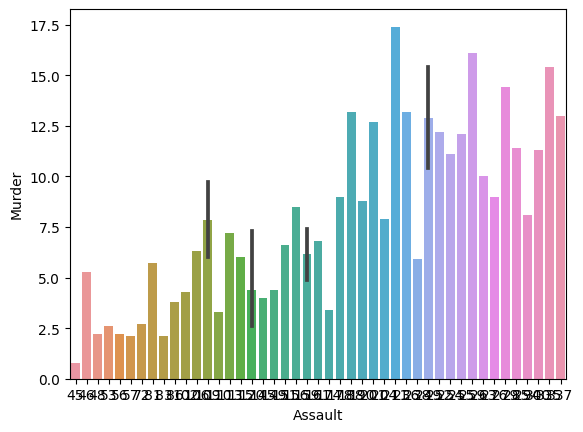

In [14]:
sns.barplot(x='Assault',y='Murder',data=data)

<Axes: xlabel='Rape', ylabel='UrbanPop'>

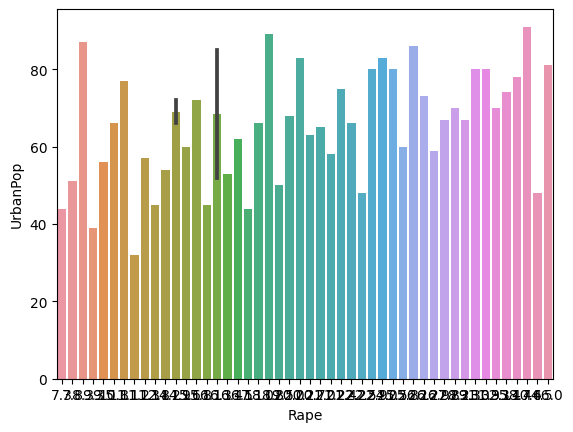

In [17]:
sns.barplot(x='Rape',y='UrbanPop',data=data)

AGGLOMERATIVE CLUSTERING

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler().fit_transform(data.iloc[:,1:])

Text(0.5, 1.0, 'Dendrogarm')

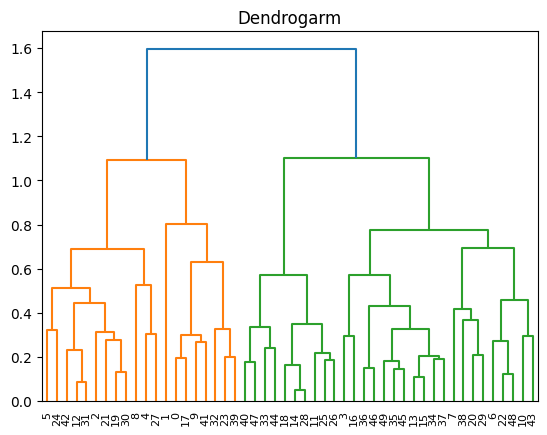

In [19]:
dendro=sch.dendrogram(sch.linkage(scaler1,method='complete'))
plt.title('Dendrogarm')

In [20]:
aggl=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
pred=aggl.fit_predict(scaler1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
data['cluster_idh']=pred


In [22]:
y=pd.DataFrame(aggl.fit_predict(scaler1),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    20
3    12
2    10
0     8
Name: clustersid, dtype: int64

Text(0.5, 0, 'Clusters')

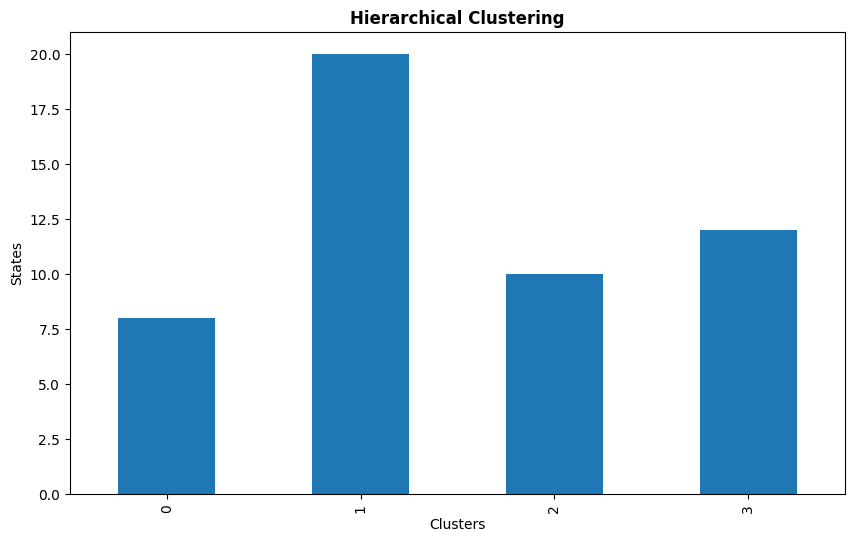

In [23]:
fig,ax=plt.subplots(figsize=(10, 6))
data.groupby(['cluster_idh']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters')

In [ ]:
print(silhouette_score(scaler1,pred))

0.3060729442426308


**KMEANS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'ELBOWGRAPH')

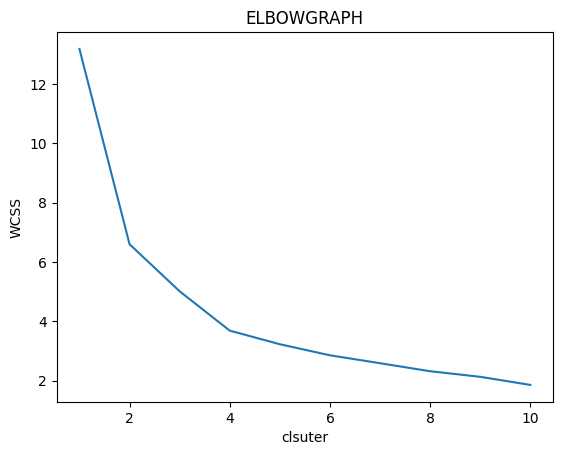

In [24]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaler1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('clsuter')
plt.ylabel('WCSS')
plt.title('ELBOWGRAPH')

from graph k value is 4

In [25]:
kmeans=KMeans(n_clusters=4,random_state=40)
pred1=kmeans.fit_predict(scaler1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
data['cluster_idk']=pred1

In [27]:
print(silhouette_score(scaler1,pred1))

0.34089035600743633


Text(0.5, 1.0, 'KMEANS Clustering')

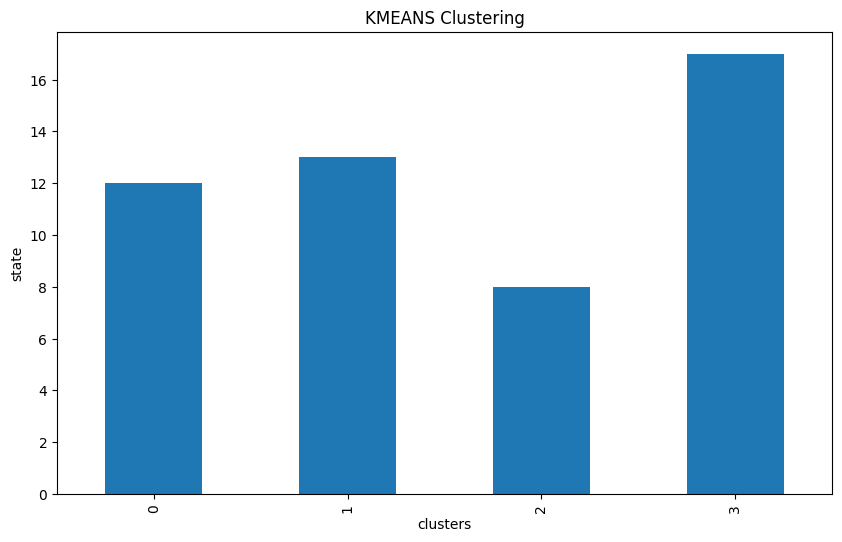

In [28]:
fig,ax=plt.subplots(figsize=(10, 6))
data.groupby(['cluster_idk']).count()['State'].plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('state')
plt.title('KMEANS Clustering')

**DBSCAN**

In [29]:
eps1=[0.22,0.24,0.26,0.28,0.30]

In [30]:
for eps in eps1:
  db=DBSCAN(eps=eps,min_samples=4)
  pred=db.fit_predict(scaler1)
  print(silhouette_score(scaler1,pred))
  y=pd.DataFrame(pred,columns=['cluster_id'])
  print(f'for eps:{eps}','\n',y['cluster_id'].value_counts())


0.23530254327069516
for eps:0.22 
 -1    32
 0    18
Name: cluster_id, dtype: int64
0.09406160443056966
for eps:0.24 
 -1    22
 1    20
 0     4
 2     4
Name: cluster_id, dtype: int64
0.22475300564355863
for eps:0.26 
  1    29
-1    17
 0     4
Name: cluster_id, dtype: int64
0.2609122917630667
for eps:0.28 
  2    29
-1     8
 1     7
 0     6
Name: cluster_id, dtype: int64
0.2473858809927262
for eps:0.3 
  1    37
 0     7
-1     6
Name: cluster_id, dtype: int64


**When we have value of epsilon = 0.28, we are getting 3 clusters silhouette score is more as compared to other dbscan models.**


silhouette score for dbscan is:  0.2609122917630667


Text(0, 0.5, 'State')

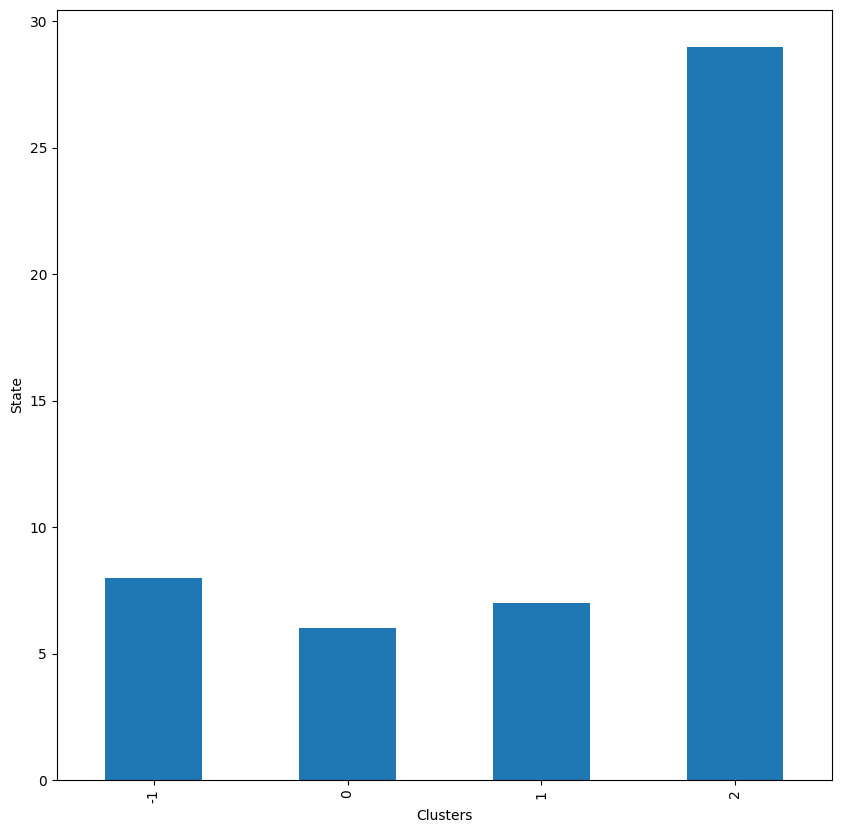

In [31]:
db=DBSCAN(eps=0.28,min_samples=4)
pred=db.fit_predict(scaler1)
data['cluster_iddb']=pred
print('silhouette score for dbscan is: ',silhouette_score(scaler1,pred))
fig,ax=plt.subplots(figsize=(10,10))
data.groupby(['cluster_iddb']).count()['State'].plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('State')

In [32]:
data

,State,Murder,Assault,UrbanPop,Rape,cluster_idh,cluster_idk,cluster_iddb
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,3,0,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,3,0,-1
5,Colorado,7.9,204,78,38.7,3,0,-1
6,Connecticut,3.3,110,77,11.1,1,3,2
7,Delaware,5.9,238,72,15.8,1,3,-1
8,Florida,15.4,335,80,31.9,3,0,-1
9,Georgia,17.4,211,60,25.8,0,2,-1
